<a href="https://colab.research.google.com/github/gitkriti19/stocktrend/blob/main/stonks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# #Get the stock quote
# df = yf.download('AAPL', start = '2012-01-01', end='2019-12-17')

# df
# #df = data


import yfinance as yf
df = yf.download('INFY', start = '2012-01-01', end='2023-06-17')




[*********************100%***********************]  1 of 1 completed


In [3]:
df.head

<bound method NDFrame.head of                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2012-01-03   6.70625   6.80500   6.66250   6.68125   5.052768  14123200
2012-01-04   6.70000   6.75750   6.63875   6.65000   5.029133   9913600
2012-01-05   6.65125   6.79375   6.64000   6.75125   5.105705  12347200
2012-01-06   6.72625   6.75000   6.64000   6.74000   5.097197  10824000
2012-01-09   6.77125   6.93250   6.75250   6.91750   5.231433  16880000
...              ...       ...       ...       ...        ...       ...
2023-06-12  15.64000  15.84000  15.62000  15.81000  15.810000   9468800
2023-06-13  15.93000  15.94000  15.70000  15.85000  15.850000   5843500
2023-06-14  15.80000  15.89000  15.49000  15.56000  15.560000  15595900
2023-06-15  15.47000  15.66000  15.41000  15.62000  15.620000   9532800
2023-06-16  15.74000  15.86000  15.64000  15.83000  15.830000  18245500

[2883 rows x 6 columns]>

In [4]:
df.tail

<bound method NDFrame.tail of                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2012-01-03   6.70625   6.80500   6.66250   6.68125   5.052768  14123200
2012-01-04   6.70000   6.75750   6.63875   6.65000   5.029133   9913600
2012-01-05   6.65125   6.79375   6.64000   6.75125   5.105705  12347200
2012-01-06   6.72625   6.75000   6.64000   6.74000   5.097197  10824000
2012-01-09   6.77125   6.93250   6.75250   6.91750   5.231433  16880000
...              ...       ...       ...       ...        ...       ...
2023-06-12  15.64000  15.84000  15.62000  15.81000  15.810000   9468800
2023-06-13  15.93000  15.94000  15.70000  15.85000  15.850000   5843500
2023-06-14  15.80000  15.89000  15.49000  15.56000  15.560000  15595900
2023-06-15  15.47000  15.66000  15.41000  15.62000  15.620000   9532800
2023-06-16  15.74000  15.86000  15.64000  15.83000  15.830000  18245500

[2883 rows x 6 columns]>

In [5]:
#get number of rows and columns
df.shape


(2883, 6)

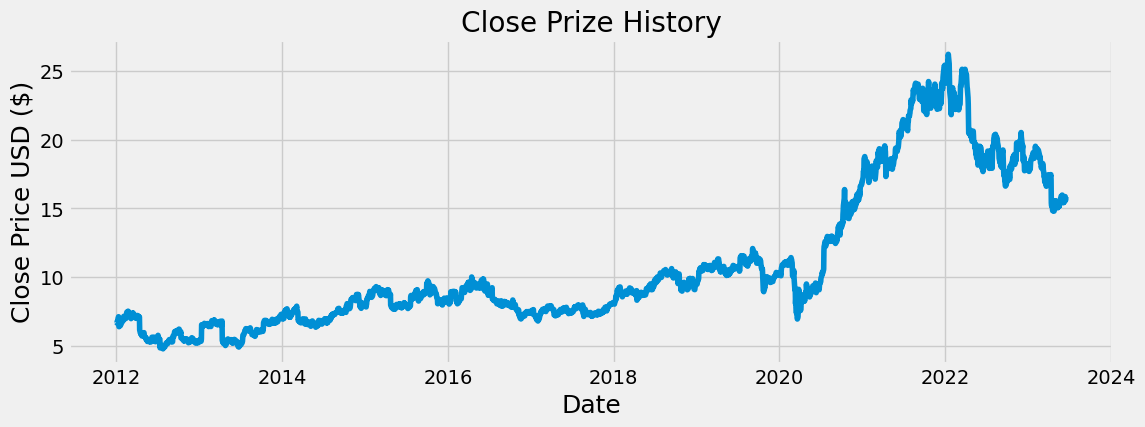

In [6]:
#visualise closing price history
plt.figure(figsize=(12,4))
plt.title('Close Prize History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2012-01-03        NaN
2012-01-04        NaN
2012-01-05        NaN
2012-01-06        NaN
2012-01-09        NaN
               ...   
2023-06-12    16.9405
2023-06-13    16.9109
2023-06-14    16.8787
2023-06-15    16.8444
2023-06-16    16.8137
Name: Close, Length: 2883, dtype: float64

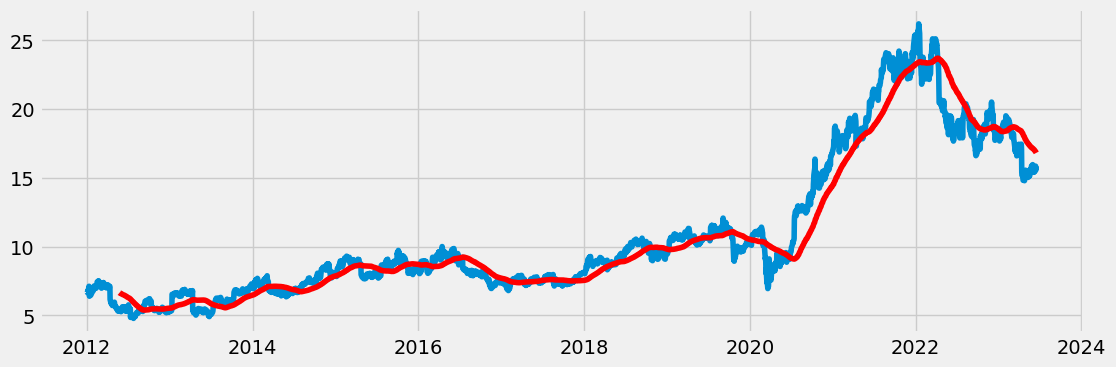

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter (['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
import math
training_data_len = math.ceil(len (dataset) * .8 )
training_data_len


2307

In [ ]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0891326 ],
       [0.08767428],
       [0.09239923],
       ...,
       [0.50347081],
       [0.50627076],
       [0.51607068]])

In [ ]:
#create the training data set
#create scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = [] #past values
y_train = [] #the value we want to predict

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.0891326 , 0.08767428, 0.09239923, 0.09187423, 0.10015751,
       0.1035408 , 0.10908242, 0.07979933, 0.07530772, 0.08020766,
       0.07950767, 0.07892435, 0.08236599, 0.0853993 , 0.08994926,
       0.09362423, 0.09718254, 0.09414923, 0.09403256, 0.09811586,
       0.10091584, 0.10109083, 0.11036575, 0.10593247, 0.1040658 ,
       0.10243248, 0.10575745, 0.10231581, 0.10418246, 0.11118241,
       0.12028234, 0.12389897, 0.12500729, 0.1246573 , 0.12792393,
       0.12529897, 0.1251823 , 0.11987401, 0.11864901, 0.11380739,
       0.11497405, 0.11386572, 0.11030743, 0.10260747, 0.11019076,
       0.11404073, 0.1168407 , 0.1132824 , 0.12121567, 0.11981567,
       0.12185733, 0.12016567, 0.11625736, 0.1136324 , 0.1141574 ,
       0.10674912, 0.11001575, 0.1122324 , 0.11316573, 0.10348248])]
[0.1066907779792444]

[array([0.0891326 , 0.08767428, 0.09239923, 0.09187423, 0.10015751,
       0.1035408 , 0.10908242, 0.07979933, 0.07530772, 0.08020766,
       0.07950767, 0.07892435, 0.082

In [ ]:
#conver xtrain and ytrain dataset to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2247, 60, 1)

In [ ]:
#build lstm model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2247/2247 [==============================] - 62s 26ms/step - loss: 5.7465e-04


In [ ]:
model.save('keras_model.h5')

In [ ]:
#create testing data set
#create a new array containing scaled vlues from 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#convert data to numpy array
x_test = np.array(x_test)

In [ ]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#get predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


18/18 [==============================] - 2s 17ms/step


In [ ]:
#get root means square error RMSE
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

0.8206441650787989

<ipython-input-31-bebfb4a985ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


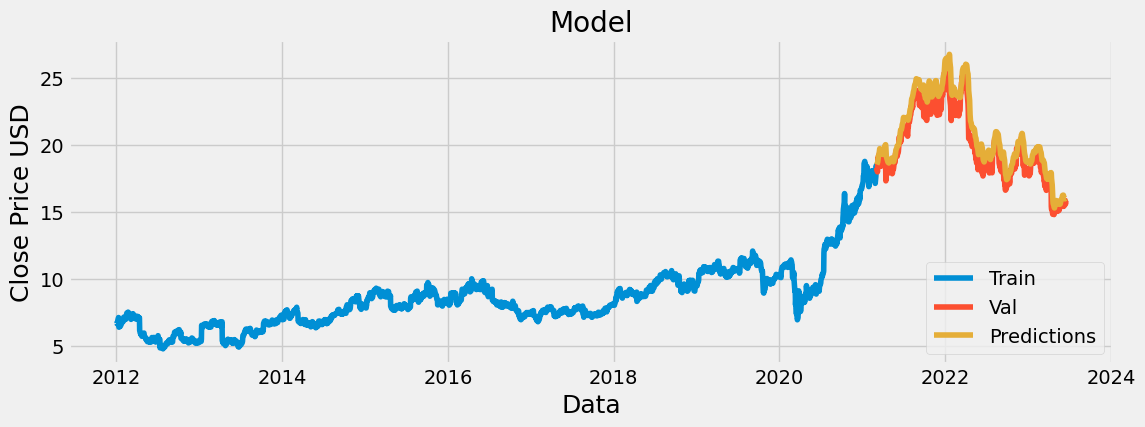

In [ ]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visiualize
plt.figure(figsize=(12,4))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#show valid and predicted price
valid

,Close,Predictions
Date,,
2021-03-05,18.280001,18.525597
2021-03-08,17.980000,18.661404
2021-03-09,18.600000,18.703003
2021-03-10,18.680000,18.822287
2021-03-11,19.080000,18.960733
...,...,...
2023-06-12,15.810000,15.964841
2023-06-13,15.850000,15.989395
2023-06-14,15.560000,16.048233


In [ ]:
# from sys import last_traceback
#get the quote
import yfinance as yf

apple_quote = yf.download('INFY', start='2012-01-01', end='2022-12-17')

# df = yf.download('AAPL', start = '2012-01-01', end='2019-12-17')
#create new dataframe
new_df = apple_quote.filter(['Close'])
#last 60 days cp and convert dataframe to np array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 dys
X_test.append(last_60_days_scaled)
#convert Xtest to numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
#visualise
# plt.figure(figsize=(12,4))
# plt.title('Model')
# plt.xlabel('Data', fontsize=18)
# plt.ylabel('Close Price USD', fontsize=18)
# plt.plot(pred_price)
# plt.show()

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 1s 774ms/step
[[19.12461]]


In [ ]:

import yfinance as yf

apple_quote2 = yf.download('INFY', start='2023-01-01', end='2023-01-01')
print(apple_quote2['Close'])


[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-01-01)')



Series([], Name: Close, dtype: float64)


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming you have the historical data stored in a DataFrame called 'stock_data'
# Make sure the 'Date' column is of type datetime
import yfinance as yf
df = yf.download('INFY', start = '2012-01-01', end='2023-06-17')

df.columns
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,6.70625,6.80500,6.66250,6.68125,5.052766,14123200
2012-01-04,6.70000,6.75750,6.63875,6.65000,5.029134,9913600
2012-01-05,6.65125,6.79375,6.64000,6.75125,5.105704,12347200
2012-01-06,6.72625,6.75000,6.64000,6.74000,5.097197,10824000
2012-01-09,6.77125,6.93250,6.75250,6.91750,5.231433,16880000
...,...,...,...,...,...,...
2023-06-12,15.64000,15.84000,15.62000,15.81000,15.810000,9468800
2023-06-13,15.93000,15.94000,15.70000,15.85000,15.850000,5843500
2023-06-14,15.80000,15.89000,15.49000,15.56000,15.560000,15595900


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = yf.download('INFY', start='2012-01-01', end='2023-06-17')

# Reset the index
df.reset_index(inplace=True)

# Convert the index to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the 'Date' and 'Close' columns
data = df[['Date', 'Close']].copy()

# Split the data into training and testing sets
train_data = data[data['Date'] < '2024-01-01']
test_data = data[data['Date'] >= '2024-01-01']

train_data['Close'] = pd.to_numeric(train_data['Close'], errors='coerce')


# Create the ARIMA model and fit it to the training data
model = ARIMA(train_data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future prices for 2024 and 2025
forecast = model_fit.get_forecast(steps=2)
forecast_values = forecast.predicted_mean





[*********************100%***********************]  1 of 1 completed


In [ ]:
# Create a DataFrame for the forecasted prices
forecasted_data = pd.DataFrame({'Date': pd.to_datetime(['2024-01-01', '2025-01-01']), 'Close': forecast})

# Combine the training and forecasted data
combined_data = pd.concat([data, forecasted_data])

# Convert 'Close' column to numeric type
combined_data['Close'] = pd.to_numeric(combined_data['Close'], errors='coerce')

# Separate actual prices from predicted values
actual_data = combined_data.loc[combined_data['Close'].notnull()]
predicted_data = combined_data.loc[combined_data['Close'].isnull()]



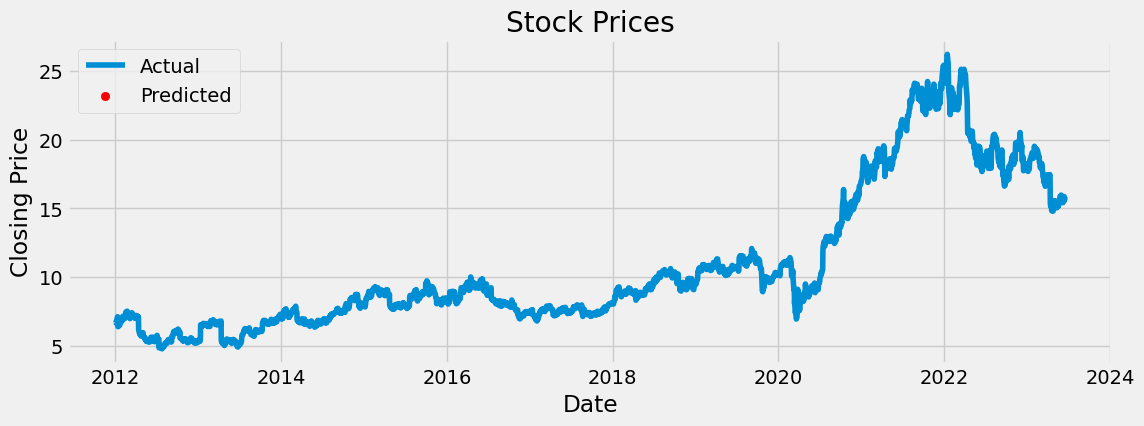

In [ ]:
# Plot actual prices and predicted values
plt.figure(figsize=(12, 4))
plt.plot(actual_data['Date'], actual_data['Close'], label='Actual')
plt.scatter(predicted_data['Date'], predicted_data['Close'], color='red', label='Predicted')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()